# PROBLEM STATEMENT:

Dataset includes house sale prices for King County in USA.

Homes that are sold in the time period: May, 2014 and May, 2015.

Data Source: https://www.kaggle.com/harlfoxem/housesalesprediction

Columns:

ida: notation for a house
date: Date house was sold
price: Price is prediction target
bedrooms: Number of Bedrooms/House
bathrooms: Number of bathrooms/House
sqft_living: square footage of the home
sqft_lot: square footage of the lot
floors: Total floors (levels) in house
waterfront: House which has a view to a waterfront
view: Has been viewed
condition: How good the condition is ( Overall )
grade: overall grade given to the housing unit, based on King County grading system
sqft_abovesquare: footage of house apart from basement
sqft_basement: square footage of the basement
yr_built: Built Year
yr_renovated: Year when house was renovated
zipcode: zip
lat: Latitude coordinate
long: Longitude coordinate
sqft_living15: Living room area in 2015(implies-- some renovations)
sqft_lot15: lotSize area in 2015(implies-- some renovations)

In [34]:
#Step 1) Import Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
#Step 2) Import dataset:
house_df=pd.read_csv(r"E:\Data_Analysis\kc_house_data.csv")
house_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
#Step 3) Analysis and Preprocessing:
#id, date is not much significant compared to other Independent Variables, so dropping the columns.
house_df1=house_df.copy()
house_df1.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
house_df1.drop(["id","date","waterfront","view","yr_renovated"],inplace=True, axis=1)
house_df1.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,3,11,3890,1530,2001,98053,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,3,7,1715,0,1995,98003,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,3,7,1060,0,1963,98198,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,3,7,1050,730,1960,98146,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,3,7,1890,0,2003,98038,47.3684,-122.031,2390,7570


In [5]:
house_df1=house_df1.astype(int)
house_df1.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1,1180,5650,1,3,7,1180,0,1955,98178,47,-122,1340,5650
1,538000,3,2,2570,7242,2,3,7,2170,400,1951,98125,47,-122,1690,7639
2,180000,2,1,770,10000,1,3,6,770,0,1933,98028,47,-122,2720,8062
3,604000,4,3,1960,5000,1,5,7,1050,910,1965,98136,47,-122,1360,5000
4,510000,3,2,1680,8080,1,3,8,1680,0,1987,98074,47,-122,1800,7503
5,1225000,4,4,5420,101930,1,3,11,3890,1530,2001,98053,47,-122,4760,101930
6,257500,3,2,1715,6819,2,3,7,1715,0,1995,98003,47,-122,2238,6819
7,291850,3,1,1060,9711,1,3,7,1060,0,1963,98198,47,-122,1650,9711
8,229500,3,1,1780,7470,1,3,7,1050,730,1960,98146,47,-122,1780,8113
9,323000,3,2,1890,6560,2,3,7,1890,0,2003,98038,47,-122,2390,7570


In [6]:
house_df1.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
house_df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.0,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.446213,3.409430,7.656873,1788.390691,291.509045,1971.005136,98077.939805,47.0,-121.931754,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.551894,0.650743,1.175459,828.090978,442.575043,29.373411,53.505026,0.0,0.252173,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,98001.000000,47.0,-122.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.0,-122.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.0,-122.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98118.000000,47.0,-122.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.0,-121.000000,6210.000000,871200.000000


In [8]:
house_df1[house_df1["bedrooms"]==0]  #Since no house cannot be having 0 bedrooms

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
875,1095000,0,0,3064,4764,3,3,7,3064,0,1990,98102,47,-122,2360,4000
3119,380000,0,0,1470,979,3,3,8,1470,0,2006,98133,47,-122,1470,1399
3467,288000,0,1,1430,1650,3,3,7,1430,0,1999,98125,47,-122,1430,1650
4868,228000,0,1,390,5900,1,2,4,390,0,1953,98118,47,-122,2170,6000
6994,1295650,0,0,4810,28008,2,3,12,4810,0,1990,98053,47,-122,4740,35061
8477,339950,0,2,2290,8319,2,3,8,2290,0,1985,98042,47,-122,2500,8751
8484,240000,0,2,1810,5669,2,3,7,1810,0,2003,98038,47,-122,1810,5685
9773,355000,0,0,2460,8049,2,3,8,2460,0,1990,98031,47,-122,2520,8050
9854,235000,0,0,1470,4800,2,3,7,1470,0,1996,98065,47,-121,1060,7200
12653,320000,0,2,1490,7111,2,3,7,1490,0,1999,98065,47,-121,1500,4675


In [9]:
house_df1[house_df1["bathrooms"]==0]  #Since no house cannot be having 0 bathrooms

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
208,180250,2,0,900,9600,1,3,6,900,0,1941,98166,47,-122,1250,14280
264,369900,1,0,760,10079,1,5,5,760,0,1936,98070,47,-122,1230,14267
350,299000,1,0,560,12120,1,3,4,560,0,1967,98014,47,-121,1300,19207
465,80000,1,0,430,5050,1,2,4,430,0,1912,98014,47,-121,1200,7500
569,405000,2,0,1160,15029,1,4,6,870,290,1937,98014,47,-121,1870,25346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19344,151000,2,0,720,5040,1,3,4,720,0,1949,98106,47,-122,1290,4120
19452,142000,0,0,290,20875,1,1,1,290,0,1963,98024,47,-121,1620,22850
20017,290000,1,0,740,1284,1,4,6,740,0,1928,98107,47,-122,1430,3988
21610,402101,2,0,1020,1350,2,3,7,1020,0,2009,98144,47,-122,1020,2007


In [10]:
m=house_df1["bedrooms"].mode()
print(m)

0    3
dtype: int32


In [11]:
house_df1["bedrooms"].replace(0,3,inplace=True) #Replacing 0 with mode value 3

In [12]:
house_df1["bathrooms"].mode()

0    2
dtype: int32

In [13]:
house_df1["bathrooms"].replace(0,2,inplace=True)  #Replacing 0 with mode value 2

In [14]:
house_df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.0,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372646,1.757692,2079.899736,1.510697e+04,1.446213,3.409430,7.656873,1788.390691,291.509045,1971.005136,98077.939805,47.0,-121.931754,1986.552492,12768.455652
std,3.671272e+05,0.926423,0.726665,918.440897,4.142051e+04,0.551894,0.650743,1.175459,828.090978,442.575043,29.373411,53.505026,0.0,0.252173,685.391304,27304.179631
min,7.500000e+04,1.000000,1.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,98001.000000,47.0,-122.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.0,-122.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.0,-122.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98118.000000,47.0,-122.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.0,-121.000000,6210.000000,871200.000000


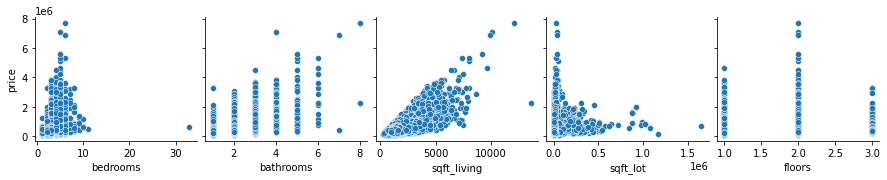

In [16]:
#Step: 5 Assumptions:
# 1.Linear Relationship:
sns.pairplot(house_df1,x_vars=["bedrooms","bathrooms","sqft_living","sqft_lot","floors"],y_vars=["price"])

In [17]:
#2. Multicollinearity:
house_df1.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308868,0.508961,0.702035,0.089661,0.237211,0.036362,0.667434,0.605567,0.323816,0.054012,-0.053203,NaN,-0.014842,0.585379,0.082447
bedrooms,0.308868,1.000000,0.455184,0.578147,0.032253,0.157938,0.026898,0.356770,0.479287,0.303001,0.155635,-0.153678,NaN,0.005416,0.393319,0.030310
bathrooms,0.508961,0.455184,1.000000,0.692861,0.087155,0.483981,-0.127677,0.595446,0.635821,0.248172,0.429816,-0.159490,NaN,0.072319,0.508415,0.084182
sqft_living,0.702035,0.578147,0.692861,1.000000,0.172826,0.353321,-0.058753,0.762704,0.876597,0.435043,0.318049,-0.199430,NaN,0.087998,0.756420,0.183286
sqft_lot,0.089661,0.032253,0.087155,0.172826,1.000000,-0.008951,-0.008958,0.113621,0.183512,0.015286,0.053080,-0.129574,NaN,0.212525,0.144608,0.718557
floors,0.237211,0.157938,0.483981,0.353321,-0.008951,1.000000,-0.293173,0.472608,0.517913,-0.235836,0.578619,-0.096743,NaN,0.098689,0.296561,-0.013252
condition,0.036362,0.026898,-0.127677,-0.058753,-0.008958,-0.293173,1.000000,-0.144674,-0.158214,0.174105,-0.361417,0.003026,NaN,-0.096406,-0.092824,-0.003406
grade,0.667434,0.356770,0.595446,0.762704,0.113621,0.472608,-0.144674,1.000000,0.755923,0.168392,0.446963,-0.184862,NaN,0.050593,0.713202,0.119248
sqft_above,0.605567,0.479287,0.635821,0.876597,0.183512,0.517913,-0.158214,0.755923,1.000000,-0.051943,0.423898,-0.261190,NaN,0.149158,0.731870,0.194050
sqft_basement,0.323816,0.303001,0.248172,0.435043,0.015286,-0.235836,0.174105,0.168392,-0.051943,1.000000,-0.133124,0.074845,NaN,-0.096471,0.200355,0.017276


In [19]:
#From above details, grade having greater correlation with other Independent variables, so dropping that column
house_df1.drop("grade",inplace=True, axis=1)


KeyError: "['grade'] not found in axis"

In [20]:
house_df1.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1,1180,5650,1,3,1180,0,1955,98178,47,-122,1340,5650
1,538000,3,2,2570,7242,2,3,2170,400,1951,98125,47,-122,1690,7639
2,180000,2,1,770,10000,1,3,770,0,1933,98028,47,-122,2720,8062
3,604000,4,3,1960,5000,1,5,1050,910,1965,98136,47,-122,1360,5000
4,510000,3,2,1680,8080,1,3,1680,0,1987,98074,47,-122,1800,7503
5,1225000,4,4,5420,101930,1,3,3890,1530,2001,98053,47,-122,4760,101930
6,257500,3,2,1715,6819,2,3,1715,0,1995,98003,47,-122,2238,6819
7,291850,3,1,1060,9711,1,3,1060,0,1963,98198,47,-122,1650,9711
8,229500,3,1,1780,7470,1,3,1050,730,1960,98146,47,-122,1780,8113
9,323000,3,2,1890,6560,2,3,1890,0,2003,98038,47,-122,2390,7570


In [23]:
#Scaling the dataset and again splitting the data set into Independent Variable and Dependent Variable:
X=house_df1.drop("price",axis=1)
print(X)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0             3          1         1180      5650       1          3   
1             3          2         2570      7242       2          3   
2             2          1          770     10000       1          3   
3             4          3         1960      5000       1          5   
4             3          2         1680      8080       1          3   
...         ...        ...          ...       ...     ...        ...   
21608         3          2         1530      1131       3          3   
21609         4          2         2310      5813       2          3   
21610         2          2         1020      1350       2          3   
21611         3          2         1600      2388       2          3   
21612         2          2         1020      1076       2          3   

       sqft_above  sqft_basement  yr_built  zipcode  lat  long  sqft_living15  \
0            1180              0      1955    98178   

In [25]:
Y=house_df1["price"]
print(Y)

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21608    360000
21609    400000
21610    402101
21611    400000
21612    325000
Name: price, Length: 21613, dtype: int32


In [27]:
X.shape

(21613, 14)

In [28]:
Y.shape

(21613,)

In [29]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
Y= Y.values.reshape(-1,1)

In [31]:
Y_scaled = scaler.fit_transform(Y)

In [32]:
X.shape

(21613, 14)

In [33]:
Y.shape

(21613, 1)

In [80]:
#Step 6) Splitting IV and DV into train and test and calling the model:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.50)

In [37]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=296d5e32da2e09dae9b076220b9dd557a731e8b7badd071833b9e9cac4ca9f60
  Stored in directory: c:\users\nvpc\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [81]:
X_train.shape

(10806, 14)

In [82]:
X_test.shape

(10807, 14)

In [83]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow.keras
from keras.models import Sequential 
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_dim = 14, activation = 'relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation = 'linear'))

In [84]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [85]:
epochs_hist = model.fit(X_train, Y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
173/173 [==============================] - 0s 1ms/step - loss: 174986215424.0000 - val_loss: 129231953920.0000
Epoch 2/100
173/173 [==============================] - 0s 791us/step - loss: 127543533568.0000 - val_loss: 117530738688.0000
Epoch 3/100
173/173 [==============================] - 0s 797us/step - loss: 104809349120.0000 - val_loss: 81364246528.0000
Epoch 4/100
173/173 [==============================] - 0s 786us/step - loss: 71111630848.0000 - val_loss: 66288504832.0000
Epoch 5/100
173/173 [==============================] - 0s 797us/step - loss: 62341677056.0000 - val_loss: 62174593024.0000
Epoch 6/100
173/173 [==============================] - 0s 797us/step - loss: 60977217536.0000 - val_loss: 61721948160.0000
Epoch 7/100
173/173 [==============================] - 0s 803us/step - loss: 59372281856.0000 - val_loss: 61737078784.0000
Epoch 8/100
173/173 [==============================] - 0s 803us/step - loss: 59114569728.0000 - val_loss: 61012008960.0000
Epoch 9/100
1

In [86]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

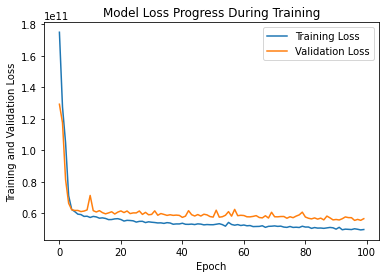

In [87]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

Text(0, 0.5, 'True Values')

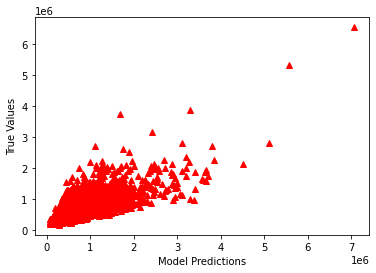

In [88]:
Y_predict = model.predict(X_test)
plt.plot(Y_test, Y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [89]:
k = X_test.shape[1]
n = len(X_test)
n

10807

In [90]:
Y_predict_orig = scaler.inverse_transform(Y_predict)
Y_test_orig = scaler.inverse_transform(Y_test)

In [91]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test_orig, Y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [92]:
print('\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


R2 = 0.5898452929377388 
Adjusted R2 = 0.589313216779578
